In [1]:
%matplotlib inline

In [37]:
import os
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib as mpl
import seaborn as sns
from graph_tool import GraphView
from graph_tool.draw import sfdp_layout, graph_draw
from sklearn.metrics import average_precision_score
from collections import OrderedDict
from matplotlib import pyplot as plt

from helpers import infected_nodes, cascade_source
from graph_helpers import load_graph_by_name, remove_filters, get_edge_weights, extract_edges, extract_nodes
from random_steiner_tree.util import from_gt
from viz_helpers import lattice_node_pos
from sample_pool import TreeSamplePool
from query_selection import PredictionErrorQueryGenerator, WeightedPredictionErrorQueryGenerator
from simulator import Simulator
from tree_stat import TreeBasedStatistics
from experiment import gen_input
from root_sampler import build_true_root_sampler
from inference import infection_probability

from viz_helpers import visualize, query_plot_setting, default_plot_setting, tree_plot_setting

In [3]:
graph = 'lattice-1024'
num_queries_to_show = 5
sampling_method = 'loop_erased'
obs_method = "leaves"
dataset_id = '{}-mic-s0.02-o{}'.format(graph, obs_method)
cascade_dir = 'cascade/{}'.format(dataset_id)
fig_dirname = 'figs/why-prederror-degenerates'

In [4]:
g = load_graph_by_name(graph, weighted=True)
g_rev = load_graph_by_name(graph, weighted=True, suffix="_reversed")
g_und = GraphView(g, directed=False)
g_und.set_directed(False)
if graph.startswith('lattice'):
    n = int(np.sqrt(g.num_vertices()))
    pos = lattice_node_pos(g, shape=(n, n))
else:
    pos = sfdp_layout(g)

load graph from data/lattice-1024/graph_weighted.gt
load graph from data/lattice-1024/graph_weighted_reversed.gt


In [5]:
if True:
    stuff = pkl.load(open('cascade-weighted/lattice-1024-msi-s0.02-o0.1/9.pkl', 'rb'))
    obs, c = stuff[:2]
    if len(stuff) > 2:
        tree = stuff[2]
    else:
        tree = None
else:
    if False:
        obs, c, tree = gen_input(g, source=18, p=get_edge_weights(g), model='ic', observation_method='leaves', 
                                 min_size=15, max_size=80, return_tree=True)
        pkl.dump((obs, c, tree), open('cascade-weighted/{}-example.pkl'.format(graph), 'wb'))    
    else:
        obs, c, tree = pkl.load(open('cascade-weighted/{}-example.pkl'.format(graph), 'rb'))
inf_nodes = infected_nodes(c)
hidden_infs = set(inf_nodes) - set(obs)
source = cascade_source(c)

In [6]:
from helpers import cascade_info
cascade_info(obs, c)

source: 632
|casdade|: 21
|observed nodes|: 2


In [7]:
gv = remove_filters(g_rev)  # the reserved graph

weights = get_edge_weights(gv)
gi = from_gt(gv, weights=weights)

sampler = TreeSamplePool(
    gv,
    n_samples=2500,
    method=sampling_method,
    gi=gi,
    return_type='nodes',
    with_resampling=False,
    with_inc_sampling=False)

params = {'n_node_samples': None,
          'prune_nodes': True,
          'root_sampler': 'true_root',
          'root_sampler_eps': 0.0,
          'min_proba': 0.01,
          'n_node_samples': None,
          'error_estimator': TreeBasedStatistics(gv)}


query_gens = [
    PredictionErrorQueryGenerator(gv, sampler, **params, verbose=True),
    EntropyQueryGenerator(gv, sampler, root_sampler='true_root'),
    RandomQueryGenerator(gv),
    PRQueryGenerator(gv)
random_gen = 
sim = Simulator(gv, q_gen, gi=gi, print_log=True)

In [8]:
qs = sim.run(50, obs, c)
queries = qs[0]

  0%|          | 0/50 [00:00<?, ?it/s]

pruning candidates from 1022 to 760
no estimation node sampling


  2%|▏         | 1/50 [00:10<08:39, 10.60s/it]

update samples started
update samples done
pruning candidates from 759 to 683
no estimation node sampling


  4%|▍         | 2/50 [00:19<08:06, 10.14s/it]

update samples started
update samples done
pruning candidates from 682 to 642
no estimation node sampling


  6%|▌         | 3/50 [00:26<07:12,  9.21s/it]

update samples started
update samples done
pruning candidates from 641 to 555
no estimation node sampling


  8%|▊         | 4/50 [00:33<06:25,  8.39s/it]

update samples started
update samples done
pruning candidates from 554 to 525
no estimation node sampling


 10%|█         | 5/50 [00:37<05:27,  7.27s/it]

update samples started
update samples done
pruning candidates from 524 to 444
no estimation node sampling
update samples started


 12%|█▏        | 6/50 [00:42<04:39,  6.36s/it]

update samples done
pruning candidates from 443 to 441
no estimation node sampling


 14%|█▍        | 7/50 [00:45<03:57,  5.52s/it]

update samples started
update samples done
pruning candidates from 440 to 423
no estimation node sampling


 16%|█▌        | 8/50 [00:49<03:26,  4.93s/it]

update samples started
update samples done
pruning candidates from 422 to 382
no estimation node sampling


 18%|█▊        | 9/50 [00:52<03:04,  4.50s/it]

update samples started
update samples done
pruning candidates from 381 to 310
no estimation node sampling
update samples started


 20%|██        | 10/50 [00:55<02:43,  4.10s/it]

update samples done
pruning candidates from 309 to 309
no estimation node sampling
update samples started


 22%|██▏       | 11/50 [00:58<02:19,  3.57s/it]

update samples done
pruning candidates from 308 to 307
no estimation node sampling


 24%|██▍       | 12/50 [01:00<01:58,  3.13s/it]

update samples started
update samples done
pruning candidates from 306 to 299
no estimation node sampling


 26%|██▌       | 13/50 [01:01<01:39,  2.68s/it]

update samples started
update samples done
pruning candidates from 298 to 293
no estimation node sampling


 28%|██▊       | 14/50 [01:03<01:24,  2.34s/it]

update samples started
update samples done
pruning candidates from 292 to 285
no estimation node sampling


 30%|███       | 15/50 [01:04<01:11,  2.03s/it]

update samples started
update samples done
pruning candidates from 284 to 262
no estimation node sampling
update samples started


 32%|███▏      | 16/50 [01:06<01:04,  1.90s/it]

update samples done
pruning candidates from 261 to 261
no estimation node sampling


 34%|███▍      | 17/50 [01:07<00:55,  1.68s/it]

update samples started
update samples done
pruning candidates from 260 to 260
no estimation node sampling


 36%|███▌      | 18/50 [01:08<00:49,  1.55s/it]

update samples started
update samples done
pruning candidates from 259 to 257
no estimation node sampling


 38%|███▊      | 19/50 [01:09<00:45,  1.45s/it]

update samples started
update samples done
pruning candidates from 256 to 256
no estimation node sampling
update samples started


 40%|████      | 20/50 [01:11<00:45,  1.51s/it]

update samples done
pruning candidates from 255 to 255
no estimation node sampling


 42%|████▏     | 21/50 [01:12<00:41,  1.44s/it]

update samples started
update samples done
pruning candidates from 254 to 254
no estimation node sampling


 44%|████▍     | 22/50 [01:14<00:38,  1.37s/it]

update samples started
update samples done
pruning candidates from 253 to 253
no estimation node sampling


 46%|████▌     | 23/50 [01:15<00:34,  1.28s/it]

update samples started
update samples done
pruning candidates from 252 to 251
no estimation node sampling


 48%|████▊     | 24/50 [01:16<00:32,  1.24s/it]

update samples started
update samples done
pruning candidates from 250 to 250
no estimation node sampling


 50%|█████     | 25/50 [01:17<00:30,  1.23s/it]

update samples started
update samples done
pruning candidates from 249 to 247
no estimation node sampling


 52%|█████▏    | 26/50 [01:19<00:34,  1.45s/it]

update samples started
update samples done
pruning candidates from 246 to 243
no estimation node sampling


 54%|█████▍    | 27/50 [01:20<00:30,  1.33s/it]

update samples started
update samples done
pruning candidates from 242 to 229
no estimation node sampling


 56%|█████▌    | 28/50 [01:21<00:26,  1.22s/it]

update samples started
update samples done
pruning candidates from 228 to 210
no estimation node sampling


 58%|█████▊    | 29/50 [01:22<00:23,  1.10s/it]

update samples started
update samples done
pruning candidates from 209 to 196
no estimation node sampling


 60%|██████    | 30/50 [01:23<00:19,  1.01it/s]

update samples started
update samples done
pruning candidates from 195 to 189
no estimation node sampling


 62%|██████▏   | 31/50 [01:23<00:17,  1.11it/s]

update samples started
update samples done
pruning candidates from 188 to 181
no estimation node sampling


 64%|██████▍   | 32/50 [01:24<00:15,  1.20it/s]

update samples started
update samples done
pruning candidates from 180 to 115
no estimation node sampling


 66%|██████▌   | 33/50 [01:24<00:11,  1.45it/s]

update samples started
update samples done
pruning candidates from 114 to 112
no estimation node sampling


 68%|██████▊   | 34/50 [01:25<00:10,  1.48it/s]

update samples started
update samples done
pruning candidates from 111 to 110
no estimation node sampling


 70%|███████   | 35/50 [01:25<00:09,  1.63it/s]

update samples started
update samples done
pruning candidates from 109 to 97
no estimation node sampling
update samples started


 74%|███████▍  | 37/50 [01:26<00:06,  2.00it/s]

update samples done
pruning candidates from 96 to 96
no estimation node sampling
update samples started
update samples done
pruning candidates from 95 to 82
no estimation node sampling


 76%|███████▌  | 38/50 [01:27<00:05,  2.32it/s]

update samples started
update samples done
pruning candidates from 81 to 79
no estimation node sampling
update samples started


 80%|████████  | 40/50 [01:27<00:03,  3.05it/s]

update samples done
pruning candidates from 78 to 78
no estimation node sampling
update samples started
update samples done
pruning candidates from 77 to 72
no estimation node sampling


 82%|████████▏ | 41/50 [01:27<00:02,  3.65it/s]

update samples started
update samples done
pruning candidates from 71 to 65
no estimation node sampling
update samples started


 84%|████████▍ | 42/50 [01:27<00:01,  4.08it/s]

update samples done
pruning candidates from 64 to 63
no estimation node sampling
update samples started


 86%|████████▌ | 43/50 [01:28<00:01,  3.74it/s]

update samples done
pruning candidates from 62 to 61
no estimation node sampling
update samples started


 90%|█████████ | 45/50 [01:28<00:01,  3.39it/s]

update samples done
pruning candidates from 60 to 58
no estimation node sampling
update samples started
update samples done
pruning candidates from 57 to 48
no estimation node sampling
update samples started


 92%|█████████▏| 46/50 [01:29<00:01,  2.33it/s]

update samples done
pruning candidates from 47 to 47
no estimation node sampling
update samples started


 94%|█████████▍| 47/50 [01:29<00:01,  2.75it/s]

update samples done
pruning candidates from 46 to 42
no estimation node sampling
update samples started


 96%|█████████▌| 48/50 [01:30<00:00,  2.88it/s]

update samples done
pruning candidates from 41 to 30
no estimation node sampling
update samples started


 98%|█████████▊| 49/50 [01:30<00:00,  2.29it/s]

update samples done
pruning candidates from 29 to 29
no estimation node sampling
num. queries reached


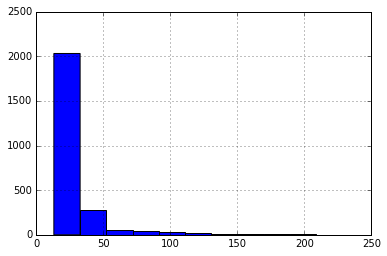


Exception in thread Thread-10:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.5/dist-packages/tqdm/_tqdm.py", line 102, in run
    for instance in self.tqdm_cls._instances:
  File "/usr/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



In [196]:
pd.Series([len(t) for t in sampler.samples]).hist()

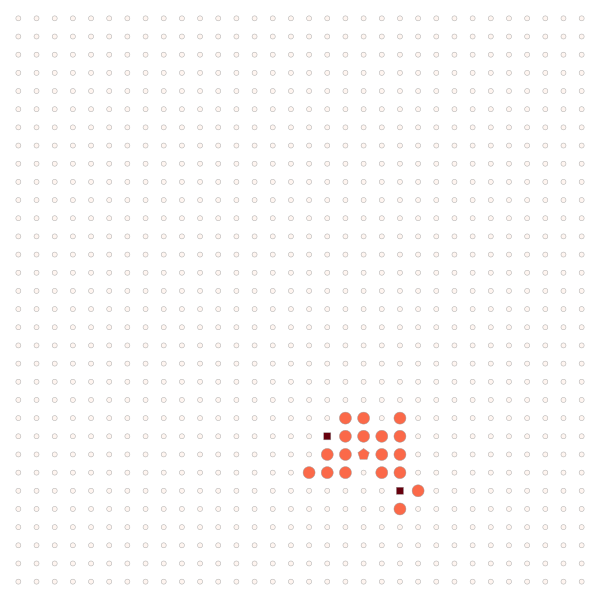

In [9]:
if tree is None:
    setting = default_plot_setting(g_und, c, obs)
else:
    setting = tree_plot_setting(g_und, c, obs, tuple(extract_edges(tree)))
visualize(g_und, pos, **setting)
# visualize(g_und, pos, **setting, output='{}/cascade.png'.format(fig_dirname))

In [10]:
c[queries]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1.,  7., -1., -1., -1.,
       -1., -1.,  6., -1., -1., -1.,  5., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  3., -1., -1., -1.,  6., -1., -1.,  7., -1.])

In [52]:
query_dir_name = 'outputs/queries-weighted/example/'
inf_dir_name = 'outputs/inf_probas-weighted/example/'
methods = ['random', 'pagerank', 'entropy', 'prediction_error']
qs_by_m = {}
inf_probas_list_by_m = {}
for m in methods:
    queries, _ = pkl.load(open('{}/{}/9.pkl'.format(query_dir_name, m), 'rb'))
    inf_probas = pkl.load(open('{}/{}/9.pkl'.format(inf_dir_name, m), 'rb'))

    qs_by_m[m] = queries
    inf_probas_list_by_m[m] = inf_probas

random


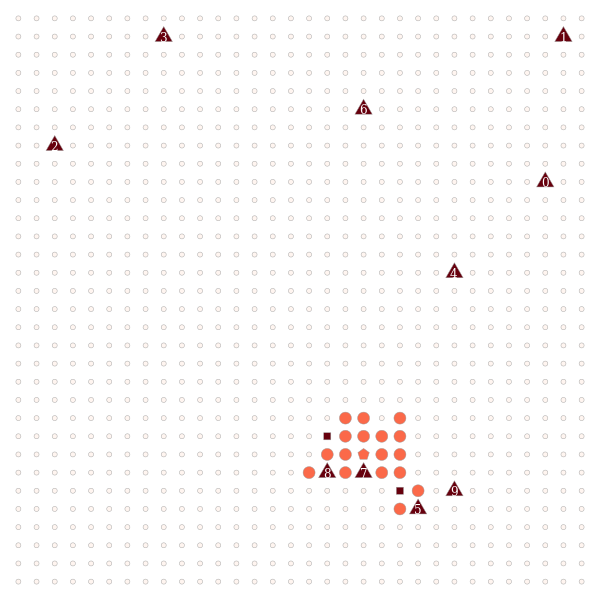

pagerank


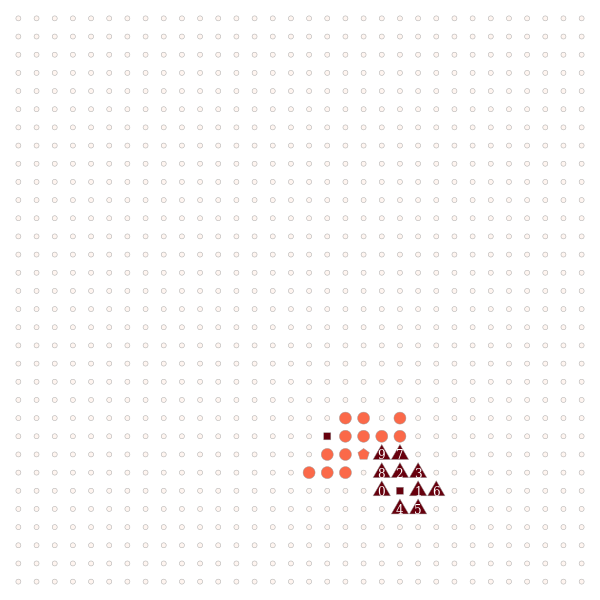

entropy


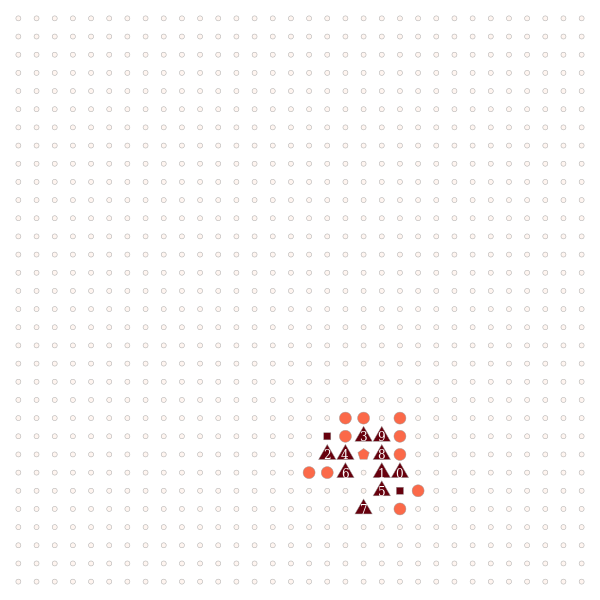

prediction_error


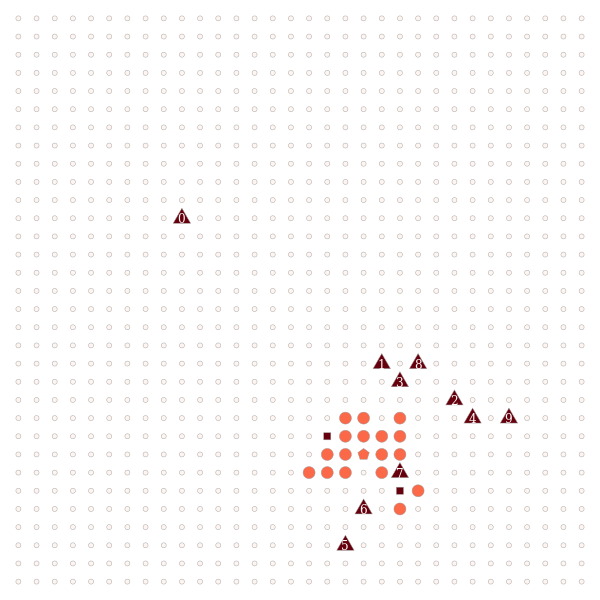

In [70]:
for m in methods:
    qs = qs_by_m[m]
    s = query_plot_setting(g, c, obs, qs[:10], with_labels=True)
    #s['node_size_info'][(49, )] = 20
    print(m)
    visualize(g_und, pos, **s, output='{}/queries-by-{}.png'.format(fig_dirname, m))

In [12]:
from infer_from_queries import infer_probas_from_queries

In [65]:
from sklearn.metrics import average_precision_score
from copy import copy

ap_scores_by_method = {}
for m in methods:
    probas_list = inf_probas_list_by_m[m]
    queries = qs_by_m[m]
    y_true = np.zeros((len(c), ))
    y_true[infected_nodes(c)] = 1
    obs_inc = copy(set(obs))
    ap_scores = []
    for inf_probas, query, _ in zip(probas_list[1:], queries, range(len(queries))):
        # mask out the non-infected observations
        # as infected queries are valuable
        # if c[query] < 0:
        if True:
            obs_inc.add(query)

        # use precision score
        mask = np.array([(i not in obs_inc) for i in range(len(c))])

        score = average_precision_score(y_true[mask], inf_probas[mask])
        
        if np.isnan(score):
            print('nan')
            score = 0
        ap_scores.append(score)
    ap_scores_by_method[m] = ap_scores

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/ranking.py:444: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


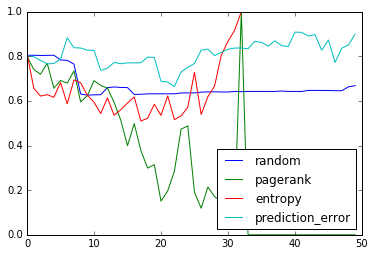

In [72]:
ax = plt.subplot()
for m in methods:
    ax.plot(ap_scores_by_method[m])
ax.legend(methods, loc='best')

(0, 1)

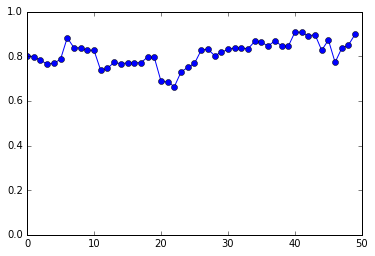

In [73]:

plt.plot(ap_scores, '-o')
plt.ylim(0, 1)

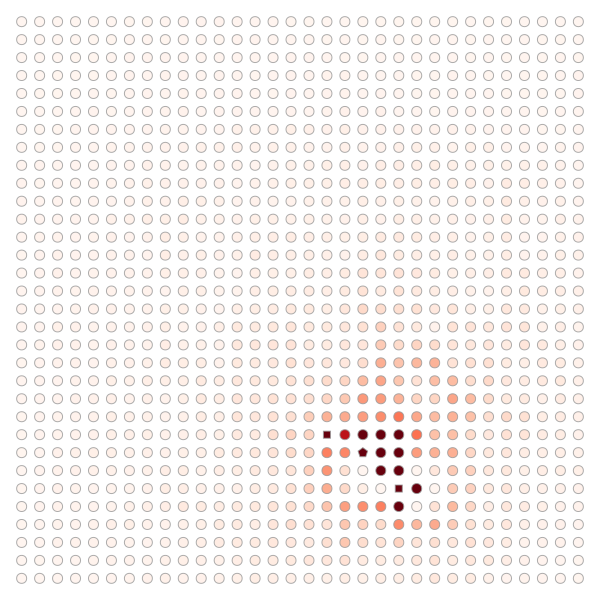

In [78]:
from viz_helpers import InfectionProbabilityViz

viz = InfectionProbabilityViz(g_und, pos)
viz.plot(c, obs, inf_probas_list_by_m['pagerank'][15])

